## Case Study #09 - Unsupervised Learning
### Sreelekshmy S L 
### NDSA B4

### Read the data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv('Wine.csv')

In [3]:
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### No object data type found.

In [5]:
wine_df.shape

(178, 13)

### There are 178 rows and 13 columns

In [6]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine_df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### No null values found

<AxesSubplot:>

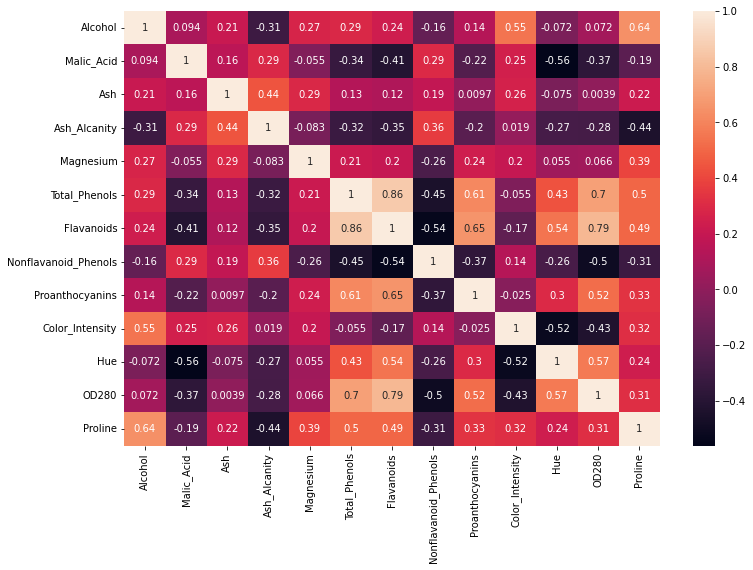

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(),annot=True)

### Since this is an unlabelled data we will use unsupervised learning techniques to find patterns, ie, to group the data into different classes of wine.
### We will use two clustering methods as follows:

## 1.KMeans

### Use the Elbow-Method to find optimum number of clusters for KMeans

In [9]:
from sklearn.cluster import KMeans
kn = range(1,13)
inertia=[]
for i in kn:
    model = KMeans(n_clusters=i)
    model.fit(wine_df)
    inertia.append(model.inertia_)
    

C:\Users\SREELEKSHMY S L\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

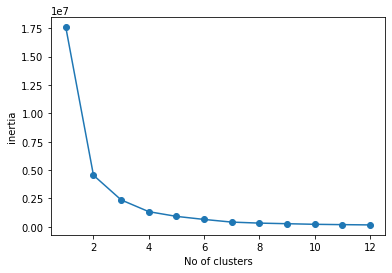

In [10]:
import matplotlib.pyplot as plt
plt.plot(kn,inertia,'o-')
plt.xlabel('No of clusters')
plt.ylabel('inertia')

### From the above graph we get the optimum number of clusters as 3.
### Now create the kmeans model with 3 clusters.

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_df)
labels = kmeans.predict(wine_df)
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


### Now we will use the metric silhouette_score to measure the correctness in clustering.

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(wine_df, labels, metric='euclidean')

0.571138193786884

### The value is 0.57 which is in the middle of 0 and 1 hence we can say that the clustering is almost proper.

### Try scaling the data 

### a.Standard scale

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#pipeline for sequence of function
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(scale,kmeans)
pipe.fit(wine_df)
label_sc = pipe.predict(wine_df)
print(label_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### b.Normalizer

In [14]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
#pipeline for sequence of function
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(norm,kmeans)
pipe.fit(wine_df)
label_nm = pipe.predict(wine_df)
print(label_nm)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 2 2 2 2 1 0 1 2 2
 0 1 1 1 2 1 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2
 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2
 2 1 1 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Comparing the KMeans clustering before and after scaling by plotting a scatter plot between two randomly chosen features

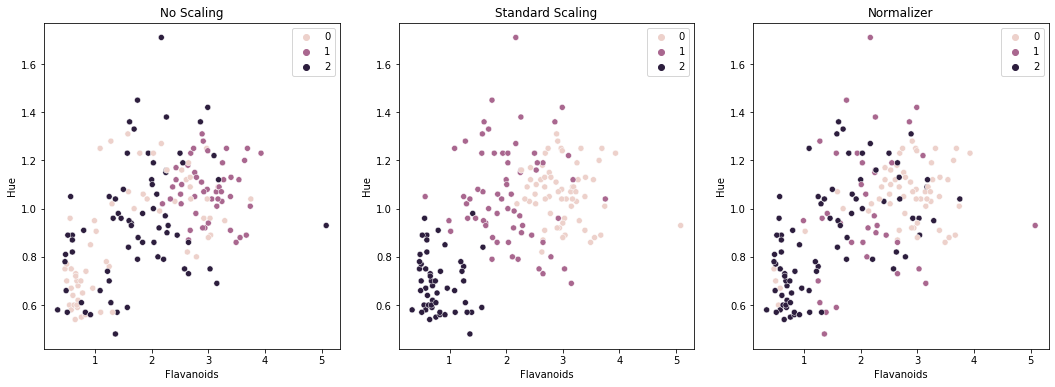

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=labels,ax=ax[0]) 
sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=label_sc,ax=ax[1]) 
sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=label_nm,ax=ax[2]) 
ax[0].set_title('No Scaling')
ax[1].set_title('Standard Scaling')
ax[2].set_title('Normalizer')
plt.show()

### We can see that standard scaling has better clustering compared to the other two

# 2.Hierarhical

### Agglomerative

### Use dendogram to find the optimum number of clusters

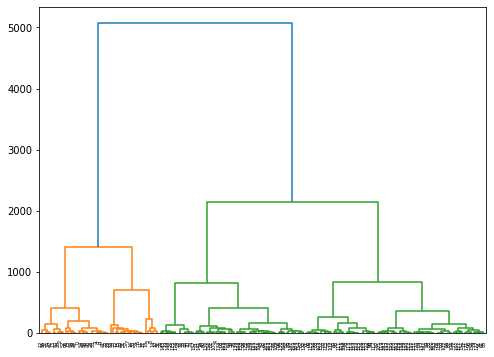

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(wine_df,method='ward')
plt.figure(figsize=(8,6))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()


### From the graph we get the optimum number of clusters as 3

### Now create agglomerative clustering model with 3 clusters

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_h=cluster.fit_predict(wine_df)
print(label_h)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [18]:
silhouette_score(wine_df, label_h, metric='euclidean')

0.5644796401732071

### Here the silhouette_score is 0.56 which is btwn 0 and 1 hence it is good clustering

### Try scaling the data 
### a.Standard scaling

In [19]:
scale_h=StandardScaler()
wine_df_s  = scale_h.fit_transform(wine_df)
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_hs=cluster.fit_predict(wine_df_s)
print(label_hs)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### b.Normalize

In [20]:
norm = Normalizer()
wine_df_n  = norm.fit_transform(wine_df)
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
label_hn=cluster.fit_predict(wine_df_n)
print(label_hn)

[0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Comparing the Agglomerative clustering before and after scaling by plotting a scatter plot between two randomly chosen features

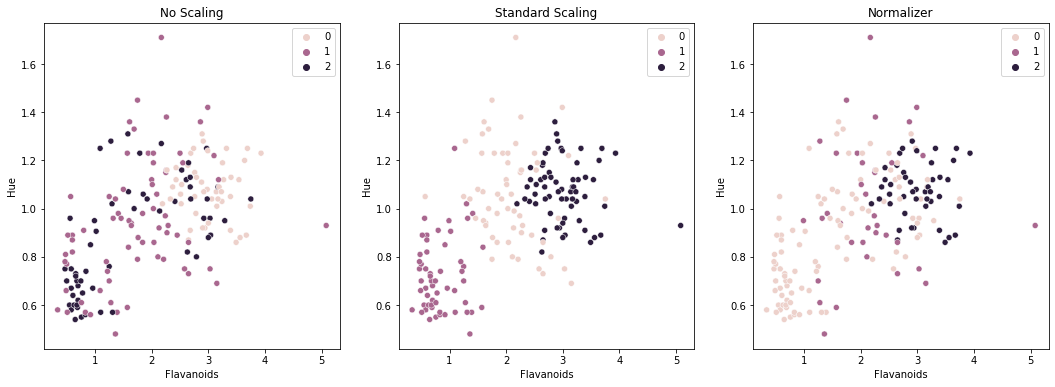

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=label_h,ax=ax[0]) 
sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=label_hs,ax=ax[1]) 
sns.scatterplot(data=wine_df,x='Flavanoids',y='Hue',hue=label_hn,ax=ax[2]) 
ax[0].set_title('No Scaling')
ax[1].set_title('Standard Scaling')
ax[2].set_title('Normalizer')
plt.show()

### Just like in Kmeans here also we can see that standard scaling has better clustering compared to the other two.


### While comparing the silhouette_score of kmeans and agglomerative both are almost same , while kmeans is slightly larger

## PCA

### Using PCA we can reduce the number of features. Here we are reducing it to two for the purpose of plotting

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(wine_df)
x_pca = pca.transform(wine_df)
x_pca.shape

(178, 2)

### Plotting the clusters formed by KMeans

Text(0, 0.5, 'Second Principal Component')

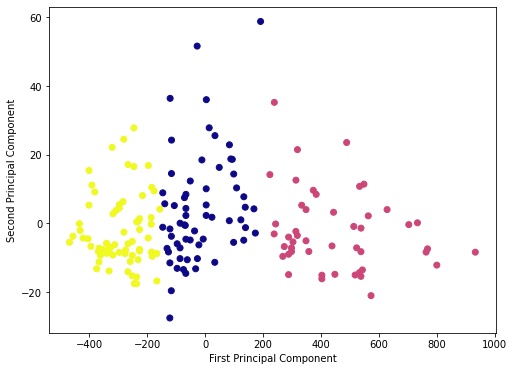

In [23]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels, cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Now plotting the clusters by Agglomerative method

Text(0, 0.5, 'Second Principal Component')

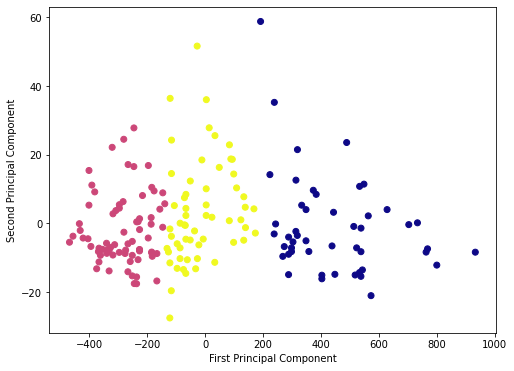

In [24]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = label_h, cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# End